Install Category Encoders (ce)

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Library 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load **Dataset**

In [ ]:

datatrain = pd.read_csv('/content/coba dulu_allvar.csv')
datatrain.tail()

,date,suhu,kelembaban_tanah,tanaman_optimal
4876,17/03/2022 19:00:00,23,80,OPTIMAL
4877,17/03/2022 20:00:00,23,80,OPTIMAL
4878,17/03/2022 21:00:00,23,80,OPTIMAL
4879,17/03/2022 22:00:00,23,80,OPTIMAL
4880,17/03/2022 23:00:00,23,80,OPTIMAL


#1. Explorasi Dataset 

In [ ]:
#MenampilkanDimensiData
print(datatrain.shape)
print(type(datatrain))

(4881, 4)
<class 'pandas.core.frame.DataFrame'>


Dataset klimatologi memiliki 4 atribut dan 4881 baris data.

In [ ]:
#Menampilkan Value Kolom tanaman_optimal
datatrain['tanaman_optimal'].value_counts()

KURANG OPTIMAL    2443
OPTIMAL           2438
Name: tanaman_optimal, dtype: int64

In [ ]:
#Menampilkan Tipe Data
datatrain.dtypes

date                object
suhu                 int64
kelembaban_tanah     int64
tanaman_optimal     object
dtype: object

Untuk Class 'BersaljuBesok', terdapat 23963 data yang 'Ya' dan 82701 yang 'Tidak'.

#2. Mengatasi Missing Values

In [ ]:
#mengecek missing value null
datatrain.isnull().sum()

date                0
suhu                0
kelembaban_tanah    0
tanaman_optimal     0
dtype: int64

Bisa terlihat nilai 0 pada semua kolom berarti sudah tidak ada missing value. Hal ini karena sudah dilakukan preprocessing data sebelumnya. 

Apabila terdapat missing value pada data numerikal, dataset harus diketahui apakah dataset tersebut skewed atau tidak. Skewness merupakan teknik pengukuran apabila distribusi tiap data simetrik atau tidak. Jika rentan nilai skewness berada di antara 2 dan -2, maka dipakailah mean. Jika tidak, dipakailah median

In [ ]:
#melihat apakah data tersebut skew
datatrain.skew(axis=0, skipna=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


suhu                0.874239
kelembaban_tanah    0.569308
dtype: float64

Bisa dilihat bahwa nilai skew berada dirange yang baik.

Apabila berada diluar range 2 sampai -2, maka pengisian missing value dilakukan dengan metode median. Apaabila nilai skew memenuhi, maka metode yang digunakan adalah dengan mean 

In [ ]:
#mengatasi missing values dengan mean atau median
datatrain.fillna(datatrain.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


proses ini dilewati saja karena data tidak terdapat missing value

In [ ]:
#mengecek ada data null
datatrain.isnull().sum()

date                0
suhu                0
kelembaban_tanah    0
tanaman_optimal     0
dtype: int64

In [ ]:
#Apabila terdapat missing value pada data kategorik maka akan digunakan library SimpleImpute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
datatrain = pd.DataFrame(imputer.fit_transform(datatrain))

#3. Memisahkan dataset dengan target variabel

In [ ]:
#meng-assign X untuk semua kolom kecuali 'tanaman_optimal' dan y untuk kolom 'tanaman_optimal'
X = datatrain.drop(['tanaman_optimal'], axis=1)
y = datatrain['tanaman_optimal']

Setelah memisahkan variable independen dari variable dependen (y), selanjutnya adalah memsplit data menjadi X_train, X_test, y_train, dan y_test dengan test sizenya 0.3

In [ ]:
#split data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=1)
X_train.shape, X_test.shape

((4392, 3), (489, 3))

Setelah membagi data, selanjutnya adalah meng-encode data kategorik menjadi tipe data yang sama supaya bisa dikomputasi.

In [ ]:
encoder = ce.OrdinalEncoder(cols=['date', 'suhu', 'kelembaban_tanah',])

#meng-assign hasil encoder kedalan X_train dan X_test
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,date,suhu,kelembaban_tanah
3939,1,1,1
2296,2,2,2
1857,3,3,3
4679,4,4,4
366,5,5,5


In [ ]:
X_train.drop(['date'], axis=1)

,suhu,kelembaban_tanah
3939,1,1
2296,2,2
1857,3,3
4679,4,4
366,5,5
...,...,...
2895,3,17
2763,10,19
905,6,8
3980,12,11


In [ ]:
X_test.drop(['date'], axis=1)

,suhu,kelembaban_tanah
3978,3.0,11.0
2889,3.0,17.0
1235,12.0,42.0
2943,3.0,19.0
2625,3.0,8.0
...,...,...
3190,9.0,6.0
4873,2.0,38.0
3786,3.0,22.0
100,4.0,32.0


#4. KNN

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection

#memasuki class ke dalam data
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
#membuat variabel y prediksi
y_pred_knn = classifier.predict(X_test)


In [ ]:
#membuat confusion matrix dan Precision, Recall, F1-Score, Support

print("----Confusion Matrix-----")
print(confusion_matrix(y_test, y_pred_knn))
print("")
print("----Precision, Recall, F1-Score, Support-----")
print(classification_report(y_test, y_pred_knn))

----Confusion Matrix-----
[[107 130]
 [120 132]]

----Precision, Recall, F1-Score, Support-----
                precision    recall  f1-score   support

KURANG OPTIMAL       0.47      0.45      0.46       237
       OPTIMAL       0.50      0.52      0.51       252

      accuracy                           0.49       489
     macro avg       0.49      0.49      0.49       489
  weighted avg       0.49      0.49      0.49       489



In [ ]:
#menghitung akurasi model knn
from sklearn.metrics import accuracy_score
print('Akurasi Model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_knn)*100), "%")

Akurasi Model: 48.8753 %


In [ ]:
y_pred_train_knn = classifier.predict(X_train)

#akurasi training set
print('Akurasi Training set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_knn)*100), "%")

Akurasi Training set: 70.8561 %


Hasil yang dapat diperoleh dari model KNN tersebut adalah akurasi model KNN dengan 48.8753% dan akurasi training set dengan 70.8561%. Dapat dilihat bahwa Hasil Algoritma KNN masih kurang memuaskan. 

Untuk menutupi kekurangan dari algoritma KNN, model selanjutnya yang akan dianalisis dan dibanding adalah algoritma Random Forest dan Decision Tree.

#5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_rf = forest.predict(X_test)

In [ ]:
y_pred_train_rf = forest.predict(X_train)

In [ ]:
#membuat confusion matrix dan Precision, Recall, F1-Score, Support

print("----Confusion Matrix-----")
print(confusion_matrix(y_test, y_pred_rf))
print("")
print("----Precision, Recall, F1-Score, Support-----")
print(classification_report(y_test, y_pred_rf))

----Confusion Matrix-----
[[219  18]
 [ 60 192]]

----Precision, Recall, F1-Score, Support-----
                precision    recall  f1-score   support

KURANG OPTIMAL       0.78      0.92      0.85       237
       OPTIMAL       0.91      0.76      0.83       252

      accuracy                           0.84       489
     macro avg       0.85      0.84      0.84       489
  weighted avg       0.85      0.84      0.84       489



In [ ]:
print('Akurasi Model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)*100), "%")
print('Akurasi Traing set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_rf)*100), "%")

Akurasi Model: 84.0491 %
Akurasi Traing set: 100.0000 %


Hasil yang diperoleh dari algoritma Random Forest adalah akurasi model dengan 84.0491% dan akurasi training set dengan 100.00%.

#6. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred_dt = tree.predict(X_test)
y_pred_train_dt = tree.predict(X_train)

In [ ]:
print('Akurasi Model: {0:0.4f}'. format(accuracy_score(y_test, y_pred_dt)*100), "%")
print('Akurasi Traing set: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_dt)*100), "%")

Akurasi Model: 96.3190 %
Akurasi Traing set: 100.0000 %


Hasil yang diperoleh dari algoritma Decision Tree adalah akurasi model dengan 96.3190% dan akurasi training set dengan 100%.

#7. Kesimpulan

Dari hasil akurasi 3 algoritma classifier tersebut, maka dapat disimpulkan bahwa algoritma Decision Tree menempati Urutan Pertama dengan Nilai Akurasi Model dan Akurasi Training tertinggi 

#8. Export Data2

In [ ]:
#dataset knn

In [ ]:
y_pred_knn = pd.DataFrame(y_pred_knn)

In [ ]:
y_pred_knn.to_csv('y_pred_knn.csv')

In [ ]:
y_pred_train_knn = pd.DataFrame(y_pred_train_knn)

In [ ]:
y_pred_train_knn.to_csv('y_pred_train_knn.csv')

In [ ]:
#dataset random forest

In [ ]:
y_pred_rf = pd.DataFrame(y_pred_rf)

In [ ]:
y_pred_rf.to_csv('y_pred_rf.csv')

In [ ]:
y_pred_train_rf = pd.DataFrame(y_pred_train_rf)

In [ ]:
y_pred_train_rf.to_csv('y_pred_train_rf.csv')

In [ ]:
#dataset decision tree

In [ ]:
y_pred_dt = pd.DataFrame(y_pred_dt)

In [ ]:
y_pred_dt.to_csv('y_pred_dt.csv')

In [ ]:
y_pred_train_dt = pd.DataFrame(y_pred_train_dt)

In [ ]:
y_pred_train_dt.to_csv('y_pred_train_dt.csv')

#8. Graph 

In [ ]:
akurasi_model_knn = accuracy_score(y_test, y_pred_knn)*100
akurasi_model_rf = accuracy_score(y_test, y_pred_rf)*100
akurasi_model_dt = accuracy_score(y_test, y_pred_dt)*100

akurasi_trainset_knn = accuracy_score(y_train, y_pred_train_knn)*100
akurasi_trainset_rf = accuracy_score(y_train, y_pred_train_rf)*100
akurasi_trainset_dt = accuracy_score(y_train, y_pred_train_dt)*100

Text(0, 0.5, 'Akurasi (%)')

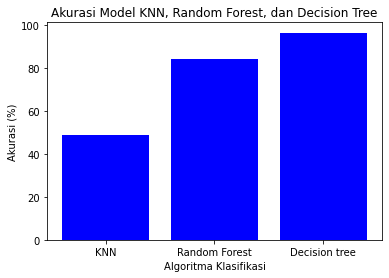

In [ ]:
#graph 

algoritma = ['KNN','Random Forest','Decision tree']
model = (akurasi_model_knn, akurasi_model_rf, akurasi_model_dt)
trainset = (akurasi_trainset_knn, akurasi_trainset_rf, akurasi_trainset_dt)

plt.bar(algoritma, model, color='blue')
plt.title('Akurasi Model KNN, Random Forest, dan Decision Tree')
plt.xlabel('Algoritma Klasifikasi')
plt.ylabel('Akurasi (%)')

Text(0, 0.5, 'Akurasi (%)')

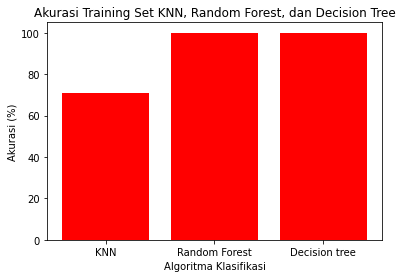

In [ ]:
plt.bar(algoritma, trainset, color='red')
plt.title('Akurasi Training Set KNN, Random Forest, dan Decision Tree')
plt.xlabel('Algoritma Klasifikasi')
plt.ylabel('Akurasi (%)')